In [1]:
import pandas as pd
import csv
file17 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2017/file2017t.csv')
file17.columns

Index(['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
       'location1', 'location2', 'location3', 'location4', 'province'],
      dtype='object')

In [18]:
file17['date_of_infraction'] = pd.to_datetime(file17['date_of_infraction'], format='%Y%m%d').dt.strftime('%Y/%m/%d')
file17['date_of_infraction'] = pd.to_datetime(file17['date_of_infraction'] )
file17['Year'] = file17['date_of_infraction'].dt.year
file17['Month'] = file17['date_of_infraction'].dt.month
file17['Date'] = file17['date_of_infraction'].dt.date
file17['DayName'] = file17['date_of_infraction'].dt.day_name()

In [6]:
file201 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2021/Parking_Tags_Data_2021.003')
file202 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2021/Parking_Tags_Data_2021.004')
file203 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2021/Parking_Tags_Data_2021.006')
file21 = pd.concat([file201, file202, file203])

In [7]:
file17.columns

Index(['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
       'location1', 'location2', 'location3', 'location4', 'province'],
      dtype='object')

In [8]:
file17['time_of_infraction'].isnull().sum() 

1376

In [19]:
mode_time = file17['time_of_infraction'].mode()
print(mode_time)
file17['time_of_infraction'] = file17['time_of_infraction'].fillna(0)

0    9
Name: time_of_infraction, dtype: int64


In [20]:
file17['time_of_infraction'] = file17['time_of_infraction'].fillna(mode_time).astype(int).astype(str).str.zfill(4)

In [21]:
file17['time_of_infraction']
file17['time_of_infraction'] = file17['time_of_infraction'].str[:2]

In [22]:
file17['time_of_infraction'] = file17['time_of_infraction'].astype(int)
file17['time_of_infraction']

0          0
1          0
2          0
3          0
4          0
          ..
2144221    0
2144222    0
2144223    0
2144224    0
2144225    0
Name: time_of_infraction, Length: 2144226, dtype: int64

In [13]:
file17_on = file17[file17['province'] == "ON"]

In [14]:
file17_on = file17[file17['province'] == "ON"]
file17_on = file17[file17['province'] == "ON"]

In [15]:
file17_fees = file17.groupby('infraction_description').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [204]:
file17_fees.sort_values('count') #send to BI

,infraction_description,count,mean_fees,revenue
0,ANGLE PARK-TOO FAR FROM METER,1,30.0,30
40,PARK HWY 30.5 M OF SIGNAL INT,1,0.0,0
42,PARK HWY ENTER/EXIT BLD ENCL,1,0.0,0
43,PARK HWY OVER PERMITTED TIME,1,0.0,0
44,PARK HWY PRO TIMES/DAYS,1,0.0,0
...,...,...,...,...
19,PARK - LONGER THAN 3 HOURS,123238,15.0,1848570
55,PARK MACHINE-REQD FEE NOT PAID,252267,30.0,7568010
73,PARK PROHIBITED TIME NO PERMIT,333730,30.0,10011900
64,PARK ON PRIVATE PROPERTY,368867,30.0,11066010


In [231]:
file20_months = file20.groupby('Month').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [53]:
file17_hours = file17.groupby('time_of_infraction').agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [233]:
file20_months.to_csv('/Users/aadya/Downloads/tables/20month.csv')

In [234]:
file19_months = file19.groupby('Month').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [235]:
file19_months.to_csv('/Users/aadya/Downloads/tables/19month.csv')

In [68]:
file17_hours

,count,mean_fees,revenue
time_of_infraction,,,
0,96574,38.205469,3689655
1,71117,37.053588,2635140
2,97787,37.658175,3682480
3,99851,29.332105,2928840
4,71963,27.362186,1969065
5,15925,28.612559,455655
6,20795,36.464054,758270
7,64432,61.891607,3987800
8,108250,45.746467,4952055


In [ ]:
file17_hours.to_csv('/Users/aadya/Downloads/parking-tickets-2017/file17hours.csv')

In [23]:
file17_loc2 = file17.groupby(['location2', 'province']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file17_prov = file17.groupby('province').agg(count = ('province', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets

In [73]:
file17_prov.sort_values('revenue')

,count,mean_fees,revenue
province,,,
GO,2,30.000000,60
PR,1,250.000000,250
NU,9,33.333333,300
HI,7,55.714286,390
WY,11,41.818182,460
...,...,...,...
AZ,4848,53.792285,260785
NY,5315,53.053622,281980
AB,8235,63.240437,520785


In [483]:
file17_loc2.sort_values('count')

,,count,mean_fees,revenue
location2,province,,,
LAKESHORE BLVD,ON,1,30.000000,30
362 WOODSWORTH RD,ON,1,40.000000,40
3620 DUFFERIN ST,ON,1,30.000000,30
363 ADELAIADE ST W,ON,1,30.000000,30
363 ADELAIDE S TW,PQ,1,30.000000,30
...,...,...,...,...
3401 DUFFERIN ST,ON,3138,55.793499,175080
1265 MILITARY TRL,ON,3592,32.655902,117300
199 RICHMOND ST W,ON,3835,44.065189,168990


In [294]:
file17_loc2.sort_values('count').head(7)

,,count,mean_fees,revenue
location2,province,,,
LAKESHORE BLVD,ON,1,30.0,30
362 WOODSWORTH RD,ON,1,40.0,40
3620 DUFFERIN ST,ON,1,30.0,30
363 ADELAIADE ST W,ON,1,30.0,30
363 ADELAIDE S TW,PQ,1,30.0,30
363 ADELAIDE ST E,ON,1,30.0,30
363 ADELAIDE ST W,PQ,1,30.0,30


In [66]:
#peak in ON
#see which top 5 are in the same area, more enforemcent or higher fee

In [24]:
file17_day = file17.groupby('DayName').agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [ ]:
#check for peak days in each location as well.(or in top 3 locations)
#provinces: AB, QC, ON(MOST)
#ON was consitently high (show poe chart for each year for revenue)
#Streets:  150 DAN, 21 HILLCREST, 40 ORCHARD VIEW ALL IN ON
#check if top 3 change (both prov and street)
#check the type ditribution in these top 3 streets, and judge
#check at which hours, increase enformcemt!
#if fees make a difference, increase fees

In [25]:
file18 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2018/file2018.csv')
file18['date_of_infraction'] = pd.to_datetime(file18['date_of_infraction'], format='%Y%m%d').dt.strftime('%Y/%m/%d')
file18['date_of_infraction'] = pd.to_datetime(file18['date_of_infraction'] )
file18['Year'] = file18['date_of_infraction'].dt.year
file18['Month'] = file18['date_of_infraction'].dt.month
file18['Date'] = file18['date_of_infraction'].dt.date
file18['DayName'] = file18['date_of_infraction'].dt.day_name()

In [87]:
file18['time_of_infraction'].isnull().sum() 

1532

In [26]:
mode_time = file18['time_of_infraction'].mode()
print(mode_time)
file18['time_of_infraction'] = file18['time_of_infraction'].fillna(0)

0    1605.0
Name: time_of_infraction, dtype: float64


In [90]:
file18['time_of_infraction'].isnull().sum() 

0

In [27]:
file18['time_of_infraction'] = file18['time_of_infraction'].fillna(mode_time).astype(int).astype(str).str.zfill(4)
file18['time_of_infraction'] = file18['time_of_infraction'].str[:2]
file18['time_of_infraction'] = file18['time_of_infraction'].astype(int)

In [28]:
file18_fees = file18.groupby('infraction_description').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file18_hours = file18.groupby('time_of_infraction').agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file18_loc2 = file18.groupby(['location2', 'province']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file18_prov = file18.groupby('province').agg(count = ('province', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets


In [205]:
file18_fees.sort_values('count')

,index,infraction_description,count,mean_fees,revenue
95,95,PARK-R OF VEH TOO FAR FROM MTR,1,30.0,30
21,21,PARK 9M OF INTERSECTING HWY,1,0.0,0
113,113,PARK/STAND/STOP NO PERMIT,1,0.0,0
51,51,PARK ON MUN PROP NO CONSENT,1,0.0,0
26,26,PARK BUS-FAIL TO ACTIV MACHINE,1,300.0,300
...,...,...,...,...,...
16,16,PARK - LONGER THAN 3 HOURS,113134,15.0,1697010
45,45,PARK MACHINE-REQD FEE NOT PAID,231652,30.0,6949560
62,62,PARK PROHIBITED TIME NO PERMIT,298487,30.0,8954610
100,100,PARK-SIGNED HWY-PROHIBIT DY/TM,337268,50.0,16863400


In [99]:
file18_prov.sort_values('revenue')

,count,mean_fees,revenue
province,,,
HI,5,32.000000,160
WY,6,38.333333,230
NU,10,37.500000,375
GO,7,58.571429,410
AK,13,36.153846,470
...,...,...,...
AZ,4016,53.382719,214385
NY,5114,53.963629,275970
AB,6689,55.607714,371960


In [484]:
file18_loc2.sort_values('count')

,,count,mean_fees,revenue
location2,province,,,
HUMBER COLLEGE BLVD,ON,1,30.000000,30
36 ROLYAT ST,NS,1,40.000000,40
36 RONALD AVE,ON,1,40.000000,40
36 RONDEAU DR,NB,1,50.000000,50
36 ROSE PARK CRES,ON,1,30.000000,30
...,...,...,...,...
273 BLOOR ST W,ON,2872,59.766713,171650
15 MARINE PARADE DR,ON,2892,37.908022,109630
1265 MILITARY TRL,ON,3500,32.040000,112140


In [290]:
file18_loc2.sort_values('count').head(10)

,,count,mean_fees,revenue
location2,province,,,
HUMBER COLLEGE BLVD,ON,1,30.0,30
36 ROLYAT ST,NS,1,40.0,40
36 RONALD AVE,ON,1,40.0,40
36 RONDEAU DR,NB,1,50.0,50
36 ROSE PARK CRES,ON,1,30.0,30
36 ROSEDALE RD,ON,1,50.0,50
36 ROSEMEADE AVE,ON,1,50.0,50
36 ROSETHORN AVE,ON,1,30.0,30
36 ROWALLAN DR,ON,1,15.0,15


In [29]:
file18_day = file18.groupby('DayName').agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [102]:
file18_day

,count,mean_fees,revenue
DayName,,,
Friday,317660,50.324765,15986165
Monday,287496,50.334474,14470960
Saturday,258348,45.575019,11774215
Sunday,203519,46.362969,9435745
Thursday,326476,49.693331,16223680
Tuesday,325476,49.814887,16213550
Wednesday,325313,49.498114,16102380


In [30]:
file19 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2019/file2019.csv')
file19['date_of_infraction'] = pd.to_datetime(file19['date_of_infraction'], format='%Y%m%d').dt.strftime('%Y/%m/%d')
file19['date_of_infraction'] = pd.to_datetime(file19['date_of_infraction'] )
file19['Year'] = file19['date_of_infraction'].dt.year
file19['Month'] = file19['date_of_infraction'].dt.month
file19['Date'] = file19['date_of_infraction'].dt.date
file19['DayName'] = file19['date_of_infraction'].dt.day_name()

In [105]:
file19['time_of_infraction'].isnull().sum() 

1941

In [31]:
mode_time = file19['time_of_infraction'].mode()
print(mode_time)
file19['time_of_infraction'] = file19['time_of_infraction'].fillna(0)

0    1605.0
Name: time_of_infraction, dtype: float64


In [32]:
file19['time_of_infraction'].isnull().sum() 

0

In [33]:
file19['time_of_infraction'] = file19['time_of_infraction'].fillna(mode_time).astype(int).astype(str).str.zfill(4)
file19['time_of_infraction'] = file19['time_of_infraction'].str[:2]
file19['time_of_infraction'] = file19['time_of_infraction'].astype(int)

In [34]:
file19_fees = file19.groupby('infraction_description').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file19_hours = file19.groupby('time_of_infraction').agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file19_loc2 = file19.groupby(['location2', 'province']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file19_prov = file19.groupby('province').agg(count = ('province', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file19_day = file19.groupby('DayName').agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [206]:
file19_fees.sort_values('count')

,index,infraction_description,count,mean_fees,revenue
0,0,ANGLE PARK-METERED SPACE-FRONT,1,0.000000,0
140,140,STAND VEHICLE UNATTENDED,1,0.000000,0
139,139,STAND VEHICLE SIGNED HIGHWAY 2,1,0.000000,0
134,134,STAND VEH-HWY-18.5 PST BSTP SM,1,0.000000,0
31,31,PARK E-VEH. IN EV SP EXCESS TM,1,60.000000,60
...,...,...,...,...,...
17,17,PARK - LONGER THAN 3 HOURS,144374,19.890735,2871705
70,70,PARK PROHIBITED TIME NO PERMIT,280619,30.000000,8418570
46,46,PARK MACHINE-REQD FEE NOT PAID,286578,30.000000,8597340
110,110,PARK-SIGNED HWY-PROHIBIT DY/TM,334575,50.000000,16728750


In [110]:
file19_prov.sort_values('revenue')

,count,mean_fees,revenue
province,,,
PR,2,30.000000,60
NL,2,40.000000,80
WY,12,37.916667,455
ID,15,32.333333,485
NU,9,57.777778,520
...,...,...,...
AZ,3479,57.378557,199620
AB,6428,47.495333,305300
NY,5859,53.571429,313875


In [485]:
#AB reduced slightly, NY and AB switched positions
file19_loc2.sort_values('count')

,,count,mean_fees,revenue
location2,province,,,
18 HENDON AVE,ON,1,30.000000,30
36 PETER ST,ON,1,50.000000,50
36 PICARO DR,ON,1,30.000000,30
36 PILOT ST,ON,1,30.000000,30
36 PINERY TRL,ON,1,50.000000,50
...,...,...,...,...
555 REXDALE BLVD,ON,3649,118.901069,433870
15 MARINE PARADE DR,ON,3703,40.056711,148330
2075 BAYVIEW AVE,ON,3745,29.991989,112320


In [287]:
file20_loc2.sort_values('count').head(10)

,,count,mean_fees,revenue
location2,province,,,
313 WAVERLEY RD,ON,1,30.0,30
35ERINDALE AVE,ON,1,30.0,30
3595 ST CLAIR AVE E,ON,1,30.0,30
359 WILLARD AVE,ON,1,50.0,50
359 WESTMORELAND AVE N,ON,1,30.0,30
359 WAVERLEY RD,ON,1,50.0,50
359 V HOWLAND AVE,ON,1,30.0,30
359 SCARBOROUGH RD,ON,1,100.0,100
359 SACKVILLE ST,ON,1,30.0,30


In [112]:
#2 very new streets in ON
file19_day

,count,mean_fees,revenue
DayName,,,
Friday,351920,50.443368,17752030
Monday,313262,50.129029,15703520
Saturday,274684,45.233796,12425000
Sunday,222205,46.705340,10378160
Thursday,343615,49.862462,17133490
Tuesday,361313,49.614711,17926440
Wednesday,346940,49.304001,17105530


In [ ]:
#sunday is consistently less

In [35]:
file20 = pd.read_csv('/Users/aadya/Downloads/parking-tickets-2020/file2020.csv')
file20['date_of_infraction'] = pd.to_datetime(file20['date_of_infraction'], format='%Y%m%d').dt.strftime('%Y/%m/%d')
file20['date_of_infraction'] = pd.to_datetime(file20['date_of_infraction'] )
file20['Year'] = file20['date_of_infraction'].dt.year
file20['Month'] = file20['date_of_infraction'].dt.month
file20['Date'] = file20['date_of_infraction'].dt.date
file20['DayName'] = file20['date_of_infraction'].dt.day_name()

In [36]:
file21['date_of_infraction'] = pd.to_datetime(file21['date_of_infraction'], format='%Y%m%d').dt.strftime('%Y/%m/%d')
file21['date_of_infraction'] = pd.to_datetime(file21['date_of_infraction'] )
file21['Year'] = file21['date_of_infraction'].dt.year
file21['Month'] = file21['date_of_infraction'].dt.month
file21['Date'] = file21['date_of_infraction'].dt.date
file21['DayName'] = file21['date_of_infraction'].dt.day_name()

In [37]:
print(file20['time_of_infraction'].isnull().sum())
mode_time = file20['time_of_infraction'].mode()
print(mode_time)
file20['time_of_infraction'] = file20['time_of_infraction'].fillna(0)

1295
0    1130.0
Name: time_of_infraction, dtype: float64


In [39]:
print(file21['time_of_infraction'].isnull().sum())
mode_time = file21['time_of_infraction'].mode()
print(mode_time)
file21['time_of_infraction'] = file21['time_of_infraction'].fillna(0)

199
0    1130.0
Name: time_of_infraction, dtype: float64


In [40]:
print(file21['time_of_infraction'].isnull().sum())

0


In [41]:
file20['time_of_infraction'] = file20['time_of_infraction'].fillna(mode_time).astype(int).astype(str).str.zfill(4)
file20['time_of_infraction'] = file20['time_of_infraction'].str[:2]
file20['time_of_infraction'] = file20['time_of_infraction'].astype(int)
file21['time_of_infraction'] = file21['time_of_infraction'].fillna(mode_time).astype(int).astype(str).str.zfill(4)
file21['time_of_infraction'] = file21['time_of_infraction'].str[:2]
file21['time_of_infraction'] = file21['time_of_infraction'].astype(int)

In [42]:
file20_fees = file20.groupby('infraction_description').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file20_hours = file20.groupby('time_of_infraction').agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file20_loc2 = file20.groupby(['location2', 'province']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file20_prov = file20.groupby('province').agg(count = ('province', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file20_day = file20.groupby('DayName').agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [43]:
file21_fees = file21.groupby('infraction_description').agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file21_hours = file21.groupby('time_of_infraction').agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
file21_loc2 = file21.groupby(['location2', 'province']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file21_prov = file21.groupby('province').agg(count = ('province', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
file21_day = file21.groupby('DayName').agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [207]:
file20_fees.sort_values('count')

,index,infraction_description,count,mean_fees,revenue
53,53,PARK ON PRIV PROP NO CONSENT,1,0.0,0
69,69,PARK VEH ON ST WITHOUT PERMIT,1,0.0,0
33,33,PARK HWY AT PROHIB TIME/DAY,1,0.0,0
31,31,PARK FAIL TO DISPLAY RECEIPT,1,0.0,0
89,89,PARK-FAIL TO DEPOSIT FEE METER,1,0.0,0
...,...,...,...,...,...
165,165,STOP-SIGNED HWY-PROHIBIT TM/DY,69283,100.0,6928300
64,64,PARK PROHIBITED TIME NO PERMIT,161725,30.0,4851750
101,101,PARK-SIGNED HWY-PROHIBIT DY/TM,204649,50.0,10232450
43,43,PARK MACHINE-REQD FEE NOT PAID,215036,30.0,6451080


In [202]:
file20_prov.sort_values('count')

,count,mean_fees,revenue
province,,,
NL,1,150.000000,150
ND,2,30.000000,60
HI,2,35.000000,70
NU,5,60.000000,300
NM,6,31.666667,190
...,...,...,...
NS,2078,45.750722,95070
AZ,3009,59.990030,180510
AB,4386,45.014820,197435


In [ ]:
#UNSUAL TREND: NY is not in top 4 ANYMORE. We have to see what happened in NY in 2019!

In [486]:
file20_loc2.sort_values('count')

,,count,mean_fees,revenue
location2,province,,,
313 WAVERLEY RD,ON,1,30.000000,30
35ERINDALE AVE,ON,1,30.000000,30
3595 ST CLAIR AVE E,ON,1,30.000000,30
359 WILLARD AVE,ON,1,50.000000,50
359 WESTMORELAND AVE N,ON,1,30.000000,30
...,...,...,...,...
4700 KEELE ST,ON,3065,54.352365,166590
2075 BAYVIEW AVE,ON,3066,30.000000,91980
19 GRAND TRUNK CRES,ON,3123,83.487032,260730


In [285]:
file20_loc2.sort_values('count').head(10)

,,count,mean_fees,revenue
location2,province,,,
313 WAVERLEY RD,ON,1,30.0,30
35ERINDALE AVE,ON,1,30.0,30
3595 ST CLAIR AVE E,ON,1,30.0,30
359 WILLARD AVE,ON,1,50.0,50
359 WESTMORELAND AVE N,ON,1,30.0,30
359 WAVERLEY RD,ON,1,50.0,50
359 V HOWLAND AVE,ON,1,30.0,30
359 SCARBOROUGH RD,ON,1,100.0,100
359 SACKVILLE ST,ON,1,30.0,30


In [121]:
#40 orchard reduced slightly in 2019, 2020. 2 new streets!
file20_day

,count,mean_fees,revenue
DayName,,,
Friday,220823,51.116845,11287775
Monday,204465,51.068129,10441645
Saturday,164628,47.715000,7855225
Sunday,138280,49.142356,6795405
Thursday,222056,50.809390,11282530
Tuesday,226848,50.576752,11473235
Wednesday,226563,50.403354,11419535


In [ ]:
#Sunday has always been the least. Some places might have free?
#check which types are new(_fees), how were they next year? if still in top 5, people need to be educated. 

In [125]:
file17_fees = file17_fees.reset_index()

In [128]:
types_17 = set(file17_fees['infraction_description'])
file18_fees = file18_fees.reset_index()
file19_fees = file19_fees.reset_index()
file20_fees = file20_fees.reset_index()
types_18 = set(file18_fees['infraction_description'])
types_19 = set(file19_fees['infraction_description'])
types_20 = set(file20_fees['infraction_description'])

In [134]:
introduced_2020 = types_20 - types_19
introduced_2019 = types_19 - types_18
introduced_2018 = types_18 - types_17
removed_2020 = types_19 - types_20
removed_2019 = types_18 - types_19
removed_2018 = types_17 - types_18
#were some types reintroduced?

In [160]:
intro_20 = pd.DataFrame({'year': [2020] * len(introduced_2020), 'infraction_description': list(introduced_2020)})
intro_19 = pd.DataFrame({'year': [2019] * len(introduced_2019), 'infraction_description': list(introduced_2019)})
intro_18 = pd.DataFrame({'year': [2018] * len(introduced_2018), 'infraction_description': list(introduced_2018)})
rem_20 = pd.DataFrame({'year': [2020] * len(removed_2020), 'infraction_description': list(removed_2020)})
rem_19 = pd.DataFrame({'year': [2019] * len(removed_2019), 'infraction_description': list(removed_2019)})
rem_18 = pd.DataFrame({'year': [2018] * len(removed_2018), 'infraction_description': list(removed_2018)})

In [ ]:
#how can we reduce tickets in ON? See when it was less or see why some streets suddenly reduced in tickets and apply that everywhere if its not because of removal of a type

In [502]:
intro_19

,year,infraction_description
0,2019,PARK MOTORCYCLE-METER-LT 45DEG
1,2019,PARK PRO VEH ON FOOTPATH
2,2019,STOP-MORE THAN 3H ON HWY VEND
3,2019,PARK-15M FAR SIDE OF CROSSWALK
4,2019,PARALLEL PARK-METERED SPACE-RE
5,2019,STOP VEH - PROHIBITED TIME
6,2019,STOP SIGNED HWY PRO TIMES/DAYS
7,2019,PARK SIGNED HWY EXCESS OF TIME
8,2019,STAND VEH-HWY-18.5 PST BSTP SM
9,2019,STOP UNAUTH VEHICLE VEND AREA


In [47]:
all = pd.concat([file17, file18, file19, file20])

In [48]:
all

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,Year,Month,Date,DayName
0,***39755,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,45 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
1,***10593,2017-01-01,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,0,OPP,5 MERCER ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
2,***39756,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,55 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
3,***92318,2017-01-01,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,0,N/S,MAPLEWOOD AVE,W/O,VAUGHAN RD,ON,2017,1,2017-01-01,Sunday
4,***39757,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,61 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403658,***42841,2020-12-31,347.0,PARK IN A FIRE ROUTE,250,23,NaN,325 BOGERT AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403659,***18794,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,23,AT,12 YONGE ST,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403660,***36469,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,40 PANORAMA CT,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403661,***38382,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,155 REDPATH AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday


In [49]:
march = all[all['Month'] == 5]

In [507]:
march.to_csv('/Users/aadya/Downloads/tables/march.csv')

In [50]:
allstreets = all.groupby(['location2', 'province','infraction_description','Year']).agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets

In [51]:
allstreets.sort_values('Year')

,,,,count,mean_fees,revenue
location2,province,infraction_description,Year,,,
2 LE MAY RD,ON,PARK-WITHIN 9M INTERSECT ROAD,2017,1,50.0,50
5230 DUNDAS STW,ON,PARK ON PRIVATE PROPERTY,2017,1,30.0,30
5230 DUNDAS STREET WEST,ON,PARK ON PRIVATE PROPERTY,2017,1,30.0,30
15 PRINCE ARTHUR AVE,ON,PARK MACHINE-REQD FEE NOT PAID,2017,51,30.0,1530
327 CARLAW AVE,ON,STAND SIGNED TRANSIT STOP,2017,5,150.0,750
...,...,...,...,...,...,...
320 RUNNYMEDE RD,ON,PARK-SIGNED HWY-EXC PERMT TIME,2020,1,40.0,40
1881 LAKESHORE BLVD E,ON,PARK IN PARK NOT IN DESIG AREA,2020,3,100.0,300
74 RANDOLPH RD,ON,PARK-SIGNED HWY-EXC PERMT TIME,2020,3,40.0,120


In [496]:
options = ['199 RICHMOND ST W', '2075 BAYVIEW AVE', '20 EDWARD ST', '1265 MILITARY TRL', '4700 KEELE ST', '19 GRAND TRUNK CRES', '1 BRIMLEY RD S', '4001 LESLIE ST' ] 

In [497]:
allstreets = allstreets.reset_index()

In [498]:
mainStreets = allstreets.loc[allstreets['location2'].isin(options)]

In [499]:
mainStreets

,location2,province,infraction_description,Year,count,mean_fees,revenue
2643,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2017,4,100.0,400
2644,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2018,5,100.0,500
2645,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2019,4,100.0,400
2646,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2020,6,100.0,600
2647,1 BRIMLEY RD S,AB,PARK IN PARK NOT IN DESIG AREA,2018,1,100.0,100
...,...,...,...,...,...,...,...
938996,4700 KEELE ST,SK,PARK ON PRIVATE PROPERTY,2020,2,30.0,60
938997,4700 KEELE ST,TX,PARK ON PRIVATE PROPERTY,2019,46,30.0,1380
938998,4700 KEELE ST,VA,PARK ON PRIVATE PROPERTY,2019,1,30.0,30
938999,4700 KEELE ST,WA,PARK ON PRIVATE PROPERTY,2019,1,30.0,30


In [158]:
file17_fees.to_csv('/Users/aadya/Downloads/tables/file17fees.csv')
file18_fees.to_csv('/Users/aadya/Downloads/tables/file18fees.csv')
file19_fees.to_csv('/Users/aadya/Downloads/tables/file19fees.csv')
file20_fees.to_csv('/Users/aadya/Downloads/tables/file20fees.csv')

file17_hours.to_csv('/Users/aadya/Downloads/tables/file17hours.csv')
file18_hours.to_csv('/Users/aadya/Downloads/tables/file18hours.csv')
file19_hours.to_csv('/Users/aadya/Downloads/tables/file19hours.csv')
file20_hours.to_csv('/Users/aadya/Downloads/tables/file20hours.csv')

file17_loc2.to_csv('/Users/aadya/Downloads/tables/file17loc2.csv')
file19_loc2.to_csv('/Users/aadya/Downloads/tables/file19loc2.csv')
file18_loc2.to_csv('/Users/aadya/Downloads/tables/file18loc2.csv')
file20_loc2.to_csv('/Users/aadya/Downloads/tables/file20loc2.csv')

file17_prov.to_csv('/Users/aadya/Downloads/tables/file17prov.csv')
file19_prov.to_csv('/Users/aadya/Downloads/tables/file19prov.csv')
file18_prov.to_csv('/Users/aadya/Downloads/tables/file18prov.csv')
file20_prov.to_csv('/Users/aadya/Downloads/tables/file20prov.csv')

file17_day.to_csv('/Users/aadya/Downloads/tables/file17day.csv')
file19_day.to_csv('/Users/aadya/Downloads/tables/file19day.csv')
file18_day.to_csv('/Users/aadya/Downloads/tables/file18day.csv')
file20_day.to_csv('/Users/aadya/Downloads/tables/file20day.csv')

In [163]:
intro_18.to_csv('/Users/aadya/Downloads/tables/intro18.csv')
intro_19.to_csv('/Users/aadya/Downloads/tables/intro19.csv')
intro_20.to_csv('/Users/aadya/Downloads/tables/intro20.csv')

rem_18.to_csv('/Users/aadya/Downloads/tables/rem_18.csv')
rem_19.to_csv('/Users/aadya/Downloads/tables/rem_19.csv')
rem_20.to_csv('/Users/aadya/Downloads/tables/rem_20.csv')

In [500]:
#allstreets.to_csv('/Users/aadya/Downloads/tables/allStreets.csv')
mainStreets.to_csv('/Users/aadya/Downloads/tables/mainStreets.csv')

In [ ]:
#annual trends (fees, revenue, number of tickets)
#why are the peaks in each at the same hour? Are these the peak hours? WORK HOURS!

In [54]:
file17_hours['Year'] = 2017
file18_hours['Year'] = 2018
file19_hours['Year'] = 2019
file20_hours['Year'] = 2020
file17_hours = file17_hours.rename(columns={"mean_fees": "mean_fees_17", "count": "count_17", "revenue":"revenue_17", "Year":"Year17"})
file18_hours = file18_hours.rename(columns={"mean_fees": "mean_fees_18", "count": "count_18", "revenue":"revenue_18", "Year":"Year18"})
file19_hours = file19_hours.rename(columns={"mean_fees": "mean_fees_19", "count": "count_19", "revenue":"revenue_19", "Year":"Year19"})
file20_hours =file20_hours.rename(columns={"mean_fees": "mean_fees_20", "count": "count_20", "revenue":"revenue_20", "Year":"Year20"})

In [191]:
file17_hours.columns

Index(['count_17', 'mean_fees_17', 'revenue_17', 'Year17'], dtype='object')

In [55]:
all_hours = file17_hours.join([file18_hours, file19_hours, file20_hours], how = 'outer')

In [194]:
all_hours = all_hours.sort_values('time_of_infraction')

In [196]:
all_hours.drop(all_hours.tail(10).index,inplace = True)

In [197]:
all_hours

,count_17,mean_fees_17,revenue_17,Year17,count_18,mean_fees_18,revenue_18,Year18,count_19,mean_fees_19,revenue_19,Year19,count_20,mean_fees_20,revenue_20,Year20
time_of_infraction,,,,,,,,,,,,,,,,
0,96574.0,38.205469,3689655.0,2017.0,86710.0,38.860627,3369605.0,2018.0,83792,39.779454,3333200,2019,46579.0,39.235063,1827530.0,2020.0
1,71117.0,37.053588,2635140.0,2017.0,67612.0,37.506582,2535895.0,2018.0,74167,38.388097,2847130,2019,50171.0,37.638676,1888370.0,2020.0
2,97787.0,37.658175,3682480.0,2017.0,89433.0,36.221976,3239440.0,2018.0,97728,36.914293,3607560,2019,70854.0,36.866161,2612115.0,2020.0
3,99851.0,29.332105,2928840.0,2017.0,96616.0,29.127060,2814140.0,2018.0,111486,30.419784,3391380,2019,78220.0,33.739453,2639100.0,2020.0
4,71963.0,27.362186,1969065.0,2017.0,72093.0,27.620920,1991275.0,2018.0,86101,28.720572,2472870,2019,56031.0,33.160750,1858030.0,2020.0
5,15925.0,28.612559,455655.0,2017.0,17507.0,29.413378,514940.0,2018.0,20548,29.429142,604710,2019,16911.0,33.257643,562420.0,2020.0
6,20795.0,36.464054,758270.0,2017.0,21647.0,36.252137,784750.0,2018.0,25440,37.594340,956400,2019,15774.0,36.790288,580330.0,2020.0
7,64432.0,61.891607,3987800.0,2017.0,60992.0,60.485801,3689150.0,2018.0,62257,60.445331,3763145,2019,33560.0,52.591627,1764975.0,2020.0
8,108250.0,45.746467,4952055.0,2017.0,102307.0,45.739050,4679425.0,2018.0,99729,45.769736,4564570,2019,62061.0,45.104333,2799220.0,2020.0


In [198]:
all_hours.to_csv('/Users/aadya/Downloads/tables/all_hours.csv')

In [ ]:
#pie_chart: eg 90% of the revenue/tickets comes from this area, 
#today: join all the tables required. Decide all the visuals. Tomorrow: 9-10: create all the visuals
#finish Power BI, hence PPT by 3pm
#read cs246 notes
#revise SQL 6-8pm
#try ML from 8-10pm
#revise PPT from 10-11:30pm
#GIVE NUMBERS! Dont give too many insights. Do fees for 30 min, location for 60, important locations for 60, peak. Write 5 insights with numbers. Create a story. Include ML if time

In [ ]:
#Why did I do fees. To see the current fee structure and how they influence parking ticket numbers.
#Given a clear negative correlation, #tickets do reduce as fees increases. 
#Causation? I checked the fee structure on an ourly bases and found that the highest fees average was around work hours in all 4 years!. show they are peak hours.
#So increasing fees for the most frequent parking tickets could help. Check for lowest 3 types of tickets too.
#But is the fees low for the most frequent parking tickets? Plot grouped bar graph for all 4 years (for the top 3 I found) and find a pattern. See if the top 3 in all 4 years
#have less fees. Then we have a measure to implement! 
#top 3 for number is different than top 3 for revenue, why? For now, I am just checking count.
#see revenue later
#take top 3 types instead. see their fee structure accross all 4.
#2019! new types only gave 12K


In [200]:
mainStreets

,location2,province,infraction_description,Year,count,mean_fees,revenue
2643,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2017,4,100.0,400
2644,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2018,5,100.0,500
2645,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2019,4,100.0,400
2646,1 BRIMLEY RD S,AB,PARK CONTRARY POSTED CONDITION,2020,6,100.0,600
2647,1 BRIMLEY RD S,AB,PARK IN PARK NOT IN DESIG AREA,2018,1,100.0,100
...,...,...,...,...,...,...,...
1045041,555 REXDALE BLVD,QC,PARK IN ACCESSIBLE NO PERMIT,2019,3,450.0,1350
1045042,555 REXDALE BLVD,QC,PARK ON PRIVATE PROPERTY,2018,1,30.0,30
1045043,555 REXDALE BLVD,QC,PARK ON PRIVATE PROPERTY,2019,14,30.0,420
1045044,555 REXDALE BLVD,QC,PARK ON PRIVATE PROPERTY,2020,4,30.0,120


In [ ]:
#x year, y is fees, label is street
#Insight 2: the top most 4 types of tickets have been the same every year. Give how much revenue they conritrbuted every year.
#ON has been at the top every year. Ticket distibution in the main streets of ON. 
#Ticket types A, B, C have max count.

In [56]:
file17_fees = file17_fees.reset_index()
file18_fees = file18_fees.reset_index()
file19_fees = file19_fees.reset_index()
file20_fees = file20_fees.reset_index()

In [57]:
file17_fees = file17_fees.rename(columns={"mean_fees": "mean_fees_17", "count": "count_17", "revenue":"revenue_17"})
file18_fees = file18_fees.rename(columns={"mean_fees": "mean_fees_18", "count": "count_18", "revenue":"revenue_18"})
file19_fees = file19_fees.rename(columns={"mean_fees": "mean_fees_19", "count": "count_19", "revenue":"revenue_19"})
file20_fees =file20_fees.rename(columns={"mean_fees": "mean_fees_20", "count": "count_20", "revenue":"revenue_20"})

In [58]:
alltypes = all.groupby(['infraction_description', 'Year']).agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets

In [59]:
alltypes = alltypes.reset_index()

In [60]:
mainTypesl = ['PARK PROHIBITED TIME NO PERMIT', 'PARK ON PRIVATE PROPERTY', 'PARK-SIGNED HWY-PROHIBIT DY/TM', 'PARK MACHINE-REQD FEE NOT PAID']

In [61]:
mainTypes = alltypes.loc[alltypes['infraction_description'].isin(mainTypesl)]

mainTypes

In [222]:
mainTypes

,infraction_description,Year,count,mean_fees,revenue
189,PARK MACHINE-REQD FEE NOT PAID,2017,252267,30.0,7568010
190,PARK MACHINE-REQD FEE NOT PAID,2018,231652,30.0,6949560
191,PARK MACHINE-REQD FEE NOT PAID,2019,286578,30.0,8597340
192,PARK MACHINE-REQD FEE NOT PAID,2020,215036,30.0,6451080
233,PARK ON PRIVATE PROPERTY,2017,368867,30.0,11066010
234,PARK ON PRIVATE PROPERTY,2018,393451,30.0,11803530
235,PARK ON PRIVATE PROPERTY,2019,456362,30.0,13690860
236,PARK ON PRIVATE PROPERTY,2020,338193,30.0,10145790
269,PARK PROHIBITED TIME NO PERMIT,2017,333730,30.0,10011900
270,PARK PROHIBITED TIME NO PERMIT,2018,298487,30.0,8954610


In [223]:
mainTypes.to_csv('/Users/aadya/Downloads/tables/mainTypes.csv')

In [224]:
alltypes.to_csv('/Users/aadya/Downloads/tables/allTypes.csv')

In [ ]:
#what happened in NY in 2019
#total revenue decrased by around 40M in 2020 from 2019! Judge removal of types, fees reduction, which type less (table with difference)COVID 
#check how much revenue was generated from these types in 2019,and subtract that from total 2019 revenue. If close to 2020, then we found the reason.
#also try checking tickets as per days and New Years. (ON/Toronto - enformcement!)
#2020 fees higher after 8pm and before 6 am - COVID CURFEW

In [225]:
rem_20 

,year,infraction_description
0,2020,PARK-INTERF W FUNERAL PROCESS.
1,2020,PARK-SIGNED HWY-RUSH HOUR
2,2020,STOP-MORE THAN 3H ON HWY VEND
3,2020,PAR PARK-R OF VEH NOT OPP MTR
4,2020,STOP-ADJACENT MID. BOUL. END
5,2020,PARAL PRK-MTRD-FR WHLS NO OPP
6,2020,STAND VEHICLE WHERE PROHIBITED
7,2020,PARK VEH.-STRTCAR TRK SNOW RT
8,2020,PARK-F OF VEH TOO FAR FROM MTR
9,2020,PARK-FRONT OF VEH NOT OPP MTR


In [229]:
type(all)

pandas.core.frame.DataFrame

In [253]:
all_on = all[all['province'] == "ON"]

In [247]:
all_on.columns

Index(['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
       'location1', 'location2', 'location3', 'location4', 'province', 'Year',
       'Month', 'Date', 'DayName'],
      dtype='object')

In [248]:
all_on

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,Year,Month,Date,DayName
0,***39755,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,45 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
1,***10593,2017-01-01,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,0,OPP,5 MERCER ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
2,***39756,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,55 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
3,***92318,2017-01-01,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,0,N/S,MAPLEWOOD AVE,W/O,VAUGHAN RD,ON,2017,1,2017-01-01,Sunday
4,***39757,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,61 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403658,***42841,2020-12-31,347.0,PARK IN A FIRE ROUTE,250,23,NaN,325 BOGERT AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403659,***18794,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,23,AT,12 YONGE ST,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403660,***36469,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,40 PANORAMA CT,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403661,***38382,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,155 REDPATH AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday


In [249]:
all_on.to_csv('/Users/aadya/Downloads/tables/ON.csv')

In [276]:
all_onfees = all_on.groupby(['infraction_description', 'Year']).agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
all_onhours = all_on.groupby(['time_of_infraction', 'Year']).agg(count = ('time_of_infraction', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))
all_onloc2 = all_on.groupby(['location2', 'Year']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets
all_onday = all_on.groupby(['DayName', 'Year']).agg(count = ('DayName', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [277]:
allon_months = all_on.groupby(['Month',  'Year']).agg(count = ('infraction_description', 'size'), mean_fees = ('set_fine_amount','mean'), revenue = ('set_fine_amount','sum'))

In [279]:
all_onfees.to_csv('/Users/aadya/Downloads/tables/ONfees.csv')
all_onhours.to_csv('/Users/aadya/Downloads/tables/ONhours.csv')
all_onloc2.to_csv('/Users/aadya/Downloads/tables/ONloc.csv')
all_onday.to_csv('/Users/aadya/Downloads/tables/ONday.csv')
allon_months.to_csv('/Users/aadya/Downloads/tables/ONmonth.csv')

In [282]:
all_on

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,Year,Month,Date,DayName
0,***39755,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,45 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
1,***10593,2017-01-01,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,0,OPP,5 MERCER ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
2,***39756,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,55 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
3,***92318,2017-01-01,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,0,N/S,MAPLEWOOD AVE,W/O,VAUGHAN RD,ON,2017,1,2017-01-01,Sunday
4,***39757,2017-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0,NR,61 LEWIS ST,NaN,NaN,ON,2017,1,2017-01-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403658,***42841,2020-12-31,347.0,PARK IN A FIRE ROUTE,250,23,NaN,325 BOGERT AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403659,***18794,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,23,AT,12 YONGE ST,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403660,***36469,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,40 PANORAMA CT,NaN,NaN,ON,2020,12,2020-12-31,Thursday
1403661,***38382,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,0,NaN,155 REDPATH AVE,NaN,NaN,ON,2020,12,2020-12-31,Thursday


In [ ]:
all_onloc2.to_csv('/Users/aadya/Downloads/tables/ONloc.csv')

In [268]:
all_onloc2 = all_on.groupby(['location2', 'Year']).agg(count = ('location2', 'size'), mean_fees = ('set_fine_amount','mean'),  revenue = ('set_fine_amount','sum')) #streets


,Year,count,mean_fees,revenue
location2,,,,
18 HENDON AVE,2019,1,30.0,30
36 HOWARD PARK AVE,2020,2,30.0,60
BROADWAY AVE,2019,1,250.0,250
EB DANFORTH AVE,2020,1,150.0,150
HUMBER COLLEGE BLVD,2018,1,30.0,30
...,...,...,...,...
yon306 YONGE ST,2018,1,50.0,50
z7 CANNIFF ST,2017,1,50.0,50
}55 FOREST MANOR RD,2018,1,15.0,15


In [270]:
all_onloc2.reset_index('location2')

,location2,count,mean_fees,revenue
Year,,,,
2019,18 HENDON AVE,1,30.0,30
2020,36 HOWARD PARK AVE,2,30.0,60
2019,BROADWAY AVE,1,250.0,250
2020,EB DANFORTH AVE,1,150.0,150
2018,HUMBER COLLEGE BLVD,1,30.0,30
...,...,...,...,...
2018,yon306 YONGE ST,1,50.0,50
2017,z7 CANNIFF ST,1,50.0,50
2018,}55 FOREST MANOR RD,1,15.0,15


In [274]:
all_onloc2.reset_index('Year').sort_values('count').tail(10)

,Year,count,mean_fees,revenue
location2,,,,
2075 BAYVIEW AVE,2019,3745,29.991989,112320
1 BRIMLEY RD S,2020,3784,113.195032,428330
199 RICHMOND ST W,2017,3835,44.065189,168990
1265 MILITARY TRL,2019,3938,34.514982,135920
4700 KEELE ST,2019,4282,52.991593,226910
2075 BAYVIEW AVE,2018,4319,30.093772,129975
20 EDWARD ST,2018,4497,46.773404,210340
4001 LESLIE ST,2020,5291,37.877528,200410
2075 BAYVIEW AVE,2017,5423,30.047944,162950


In [ ]:
#see top 10 streets in each year. See if they are close to important properties and offices. If yes, then we can increase the fine amount here to get more revenue.  

In [295]:
#ML

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [393]:
from sklearn.linear_model import LinearRegression

In [67]:
all = pd.concat([file17, file18, file19, file20, file21])

In [64]:
all.columns

Index(['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
       'location1', 'location2', 'location3', 'location4', 'province', 'Year',
       'Month', 'Date', 'DayName'],
      dtype='object')

In [65]:
all['day_of_week'] = all['date_of_infraction'].dt.dayofweek

In [73]:
all.drop(all.tail(39).index,inplace = True)

In [68]:
all = all.sort_values('time_of_infraction')

In [74]:
combined_hours = all.groupby(['time_of_infraction', 'date_of_infraction']).size().reset_index(name='ticket_count')

In [75]:
combined_hours

,time_of_infraction,date_of_infraction,ticket_count
0,0,2017-01-01,2042
1,0,2017-01-02,2830
2,0,2017-01-03,7128
3,0,2017-01-04,7392
4,0,2017-01-05,6666
...,...,...,...
28373,23,2021-08-06,30
28374,23,2021-08-07,70
28375,23,2021-08-08,37
28376,24,2019-05-02,1


In [83]:
combined_hours17 = combined_hours[combined_hours['date_of_infraction'].dt.year != 2017]
combined_hours17

,time_of_infraction,date_of_infraction,ticket_count
365,0,2018-01-01,109
366,0,2018-01-02,193
367,0,2018-01-03,165
368,0,2018-01-04,180
369,0,2018-01-05,161
...,...,...,...
28373,23,2021-08-06,30
28374,23,2021-08-07,70
28375,23,2021-08-08,37
28376,24,2019-05-02,1


In [96]:
X = combined_hours17[['time_of_infraction', 'date_of_infraction']]
X['day_of_week'] = X['date_of_infraction'].dt.dayofweek
X['month'] = X['date_of_infraction'].dt.month
X['day'] = X['date_of_infraction'].dt.day
X['is_weekend'] = X['day_of_week'].isin([5, 6]).astype(int)
X

,time_of_infraction,date_of_infraction,day_of_week,month,day,is_weekend
365,0,2018-01-01,0,1,1,0
366,0,2018-01-02,1,1,2,0
367,0,2018-01-03,2,1,3,0
368,0,2018-01-04,3,1,4,0
369,0,2018-01-05,4,1,5,0
...,...,...,...,...,...,...
28373,23,2021-08-06,4,8,6,0
28374,23,2021-08-07,5,8,7,1
28375,23,2021-08-08,6,8,8,1
28376,24,2019-05-02,3,5,2,0


In [97]:
y = combined_hours17['ticket_count']

# Drop the date_of_infraction as it's no longer needed
X = X.drop(columns='date_of_infraction')

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Regressor MSE: {mse}')

XGBoost Regressor MSE: 4681.0298609646115


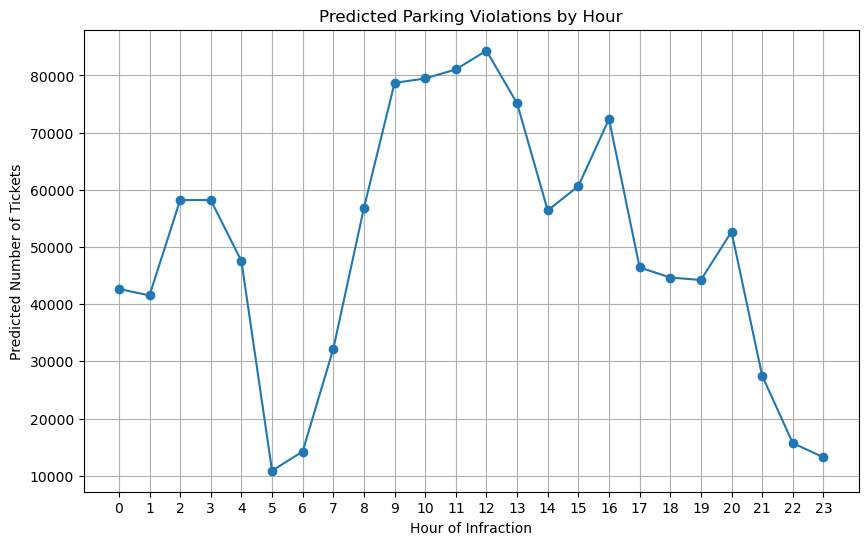

In [100]:
# Create a new DataFrame to hold the test data and predictions
results = X_test.copy()
results['predicted_ticket_count'] = y_pred

# Aggregate predictions to identify peak hours
predicted_peak_hours = results.groupby('time_of_infraction')['predicted_ticket_count'].sum().reset_index()

# Plot the predicted peak hours
plt.figure(figsize=(10, 6))
plt.plot(predicted_peak_hours['time_of_infraction'], predicted_peak_hours['predicted_ticket_count'], marker='o')
plt.title('Predicted Parking Violations by Hour')
plt.xlabel('Hour of Infraction')
plt.ylabel('Predicted Number of Tickets')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Optimized Model MSE: {mse}')
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Optimized Model MSE: {mse}')

Optimized Model MSE: 2914.6036364296647
Optimized Model MSE: 2914.6036364296647
